In [5]:
!pip install -q kaggle
import json

data = {"username":"thirametphuthong","key":"d5221d0e19fb9a55b3ef8162e6b9918c"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c har-competition-onsite
!unzip -q /content/har-competition-onsite.zip

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          13354        275  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          10118        212  1.0              
kapturovalexander/online-shop-2023                                  🏪🏬🛍️🛒 Online shop 2023                                3KB  2024-07-10 15:36:20            762         21  1.0              
ihelon/coffee-sales                     

In [1]:
import os
from glob import glob
from natsort import os_sorted
from tqdm import tqdm

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
input_dir = "/content/HAR"
train_dir = input_dir + "/train"
test_dir  = input_dir + "/test"
df_paths  = glob(os.path.join(train_dir,"*","*.csv"))
df_paths

['/content/HAR/train/C04/S4.csv',
 '/content/HAR/train/C04/S3.csv',
 '/content/HAR/train/C04/S2.csv',
 '/content/HAR/train/C04/S1.csv',
 '/content/HAR/train/C07/S3.csv',
 '/content/HAR/train/C07/S2.csv',
 '/content/HAR/train/C07/S1.csv',
 '/content/HAR/train/C01/S4.csv',
 '/content/HAR/train/C01/S3.csv',
 '/content/HAR/train/C01/S2.csv',
 '/content/HAR/train/C01/S1.csv',
 '/content/HAR/train/C01/S5.csv',
 '/content/HAR/train/C06/S4.csv',
 '/content/HAR/train/C06/S3.csv',
 '/content/HAR/train/C06/S2.csv',
 '/content/HAR/train/C06/S1.csv',
 '/content/HAR/train/C06/S5.csv',
 '/content/HAR/train/C05/S4.csv',
 '/content/HAR/train/C05/S3.csv',
 '/content/HAR/train/C05/S2.csv',
 '/content/HAR/train/C05/S1.csv',
 '/content/HAR/train/C09/S4.csv',
 '/content/HAR/train/C09/S3.csv',
 '/content/HAR/train/C09/S2.csv',
 '/content/HAR/train/C09/S1.csv',
 '/content/HAR/train/C02/S4.csv',
 '/content/HAR/train/C02/S3.csv',
 '/content/HAR/train/C02/S2.csv',
 '/content/HAR/train/C02/S1.csv',
 '/content/HAR

In [3]:
concatdf = []
for activity_dir in os.listdir(train_dir):
    if activity_dir[0] == '.':
        continue
    print(activity_dir)
    for csv_file in os.listdir(os.path.join(train_dir,activity_dir)):
        print(os.path.join(train_dir, activity_dir, csv_file))
        df = pd.read_csv(os.path.join(train_dir, activity_dir, csv_file))
        df['label'] = activity_dir
        print(csv_file,df.shape[0],"->",200*(df.shape[0]//200))
        concatdf.append(df[:200*(df.shape[0]//200)])
        # break
    # break
frame = pd.concat(concatdf)

C04
/content/HAR/train/C04/S4.csv
S4.csv 26400 -> 26400
/content/HAR/train/C04/S3.csv
S3.csv 25100 -> 25000
/content/HAR/train/C04/S2.csv
S2.csv 19200 -> 19200
/content/HAR/train/C04/S1.csv
S1.csv 24400 -> 24400
C07
/content/HAR/train/C07/S3.csv
S3.csv 24600 -> 24600
/content/HAR/train/C07/S2.csv
S2.csv 24500 -> 24400
/content/HAR/train/C07/S1.csv
S1.csv 21100 -> 21000
C01
/content/HAR/train/C01/S4.csv
S4.csv 16100 -> 16000
/content/HAR/train/C01/S3.csv
S3.csv 12100 -> 12000
/content/HAR/train/C01/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C01/S1.csv
S1.csv 27300 -> 27200
/content/HAR/train/C01/S5.csv
S5.csv 13300 -> 13200
C06
/content/HAR/train/C06/S4.csv
S4.csv 12200 -> 12200
/content/HAR/train/C06/S3.csv
S3.csv 12300 -> 12200
/content/HAR/train/C06/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C06/S1.csv
S1.csv 23200 -> 23200
/content/HAR/train/C06/S5.csv
S5.csv 13400 -> 13400
C05
/content/HAR/train/C05/S4.csv
S4.csv 18532 -> 18400
/content/HAR/train/C05/S3.csv
S3.csv 9400 ->

In [4]:
input_dir = "/content/HAR"
train_dir = input_dir + "/train"
test_dir  = input_dir + "/test"
df_paths  = glob(os.path.join(train_dir,'*','*.csv'))

In [5]:
concatdf = []
for activity_dir in os.listdir(train_dir):
    print(activity_dir)
    for csv_file in os.listdir(os.path.join(train_dir,activity_dir)):
        print(os.path.join(train_dir, activity_dir, csv_file))
        df = pd.read_csv(os.path.join(train_dir, activity_dir, csv_file))
        df['label'] = activity_dir
        print(csv_file,df.shape[0],"->",500*(df.shape[0]//500))
        concatdf.append(df[:500*(df.shape[0]//500)])
frame = pd.concat(concatdf)

C04
/content/HAR/train/C04/S4.csv
S4.csv 26400 -> 26000
/content/HAR/train/C04/S3.csv
S3.csv 25100 -> 25000
/content/HAR/train/C04/S2.csv
S2.csv 19200 -> 19000
/content/HAR/train/C04/S1.csv
S1.csv 24400 -> 24000
C07
/content/HAR/train/C07/S3.csv
S3.csv 24600 -> 24500
/content/HAR/train/C07/S2.csv
S2.csv 24500 -> 24500
/content/HAR/train/C07/S1.csv
S1.csv 21100 -> 21000
C01
/content/HAR/train/C01/S4.csv
S4.csv 16100 -> 16000
/content/HAR/train/C01/S3.csv
S3.csv 12100 -> 12000
/content/HAR/train/C01/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C01/S1.csv
S1.csv 27300 -> 27000
/content/HAR/train/C01/S5.csv
S5.csv 13300 -> 13000
C06
/content/HAR/train/C06/S4.csv
S4.csv 12200 -> 12000
/content/HAR/train/C06/S3.csv
S3.csv 12300 -> 12000
/content/HAR/train/C06/S2.csv
S2.csv 24100 -> 24000
/content/HAR/train/C06/S1.csv
S1.csv 23200 -> 23000
/content/HAR/train/C06/S5.csv
S5.csv 13400 -> 13000
C05
/content/HAR/train/C05/S4.csv
S4.csv 18532 -> 18500
/content/HAR/train/C05/S3.csv
S3.csv 9400 ->

In [6]:
frame

,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,label
0,0.903763,-0.483924,-9.900170,0.027580,-0.038369,1.137977,C04
1,1.571843,0.348617,-0.621035,0.030863,-0.021764,1.497450,C04
2,2.981069,2.847833,11.312855,0.034913,-0.011544,1.589977,C04
3,2.629231,2.437134,3.373610,0.056145,-0.009162,1.597422,C04
4,2.280016,1.755819,-5.118425,0.087775,-0.006946,1.546373,C04
...,...,...,...,...,...,...,...
12495,1.870387,1.081655,-0.757064,0.252922,0.007660,0.021273,C03
12496,1.866964,1.122684,-0.732323,0.259938,0.024372,0.036873,C03
12497,1.874299,1.172415,-0.689204,0.265952,0.043870,0.051528,C03
12498,1.867942,1.183605,-0.656688,0.274639,0.059189,0.063347,C03


In [7]:
from tqdm import tqdm

In [8]:
nr = 500
new = []
frame = frame
for i in tqdm(range(len(frame)//nr)):
    x = frame[i*nr:(i+1)*nr]
    a = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].mean()
    a = a.rename(columns={'Acc_X':'Acc_Xmean',
                          'Acc_Y':'Acc_Ymean',
                          'Acc_Z':'Acc_Zmean',
                          'Gyr_X':'Gyr_Xmean',
                          'Gyr_Y':'Gyr_Ymean',
                          'Gyr_Z':'Gyr_Zmean',})
    b = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].std()
    b = b.rename(columns={'Acc_X':'Acc_Xstd',
                          'Acc_Y':'Acc_Ystd',
                          'Acc_Z':'Acc_Zstd',
                          'Gyr_X':'Gyr_Xstd',
                          'Gyr_Y':'Gyr_Ystd',
                          'Gyr_Z':'Gyr_Zstd',
                          })
    ab = a.join(b)
    new.append(ab)
train_df = pd.concat(new)
train_df

100%|██████████| 1285/1285 [00:04<00:00, 278.36it/s]


,Acc_Xmean,Acc_Ymean,Acc_Zmean,Gyr_Xmean,Gyr_Ymean,Gyr_Zmean,Acc_Xstd,Acc_Ystd,Acc_Zstd,Gyr_Xstd,Gyr_Ystd,Gyr_Zstd
label,,,,,,,,,,,,
C04,1.630181,0.955980,-3.271133,-0.002644,0.001499,0.012478,1.673812,2.636416,5.614656,0.204671,0.050057,0.927354
C04,1.321320,0.687762,-2.968450,0.000232,-0.000263,-0.005771,1.625063,2.265617,5.479949,0.226276,0.069312,1.020210
C04,1.438849,0.771599,-3.231045,0.000820,-0.007735,0.007466,1.618948,2.250416,5.136268,0.182837,0.064489,0.893114
C04,1.600029,0.927553,-2.749372,-0.003245,0.001569,0.006100,1.575847,2.143742,5.216880,0.195201,0.056517,0.900515
C04,1.470902,0.623932,-2.657754,0.111049,0.008537,-0.176160,1.388012,2.068623,4.516585,0.241295,0.056078,0.928933
...,...,...,...,...,...,...,...,...,...,...,...,...
C03,1.957894,0.284485,-0.506084,0.178079,0.007879,-0.034338,0.332881,0.712582,0.459728,0.390815,0.104396,0.169034
C03,1.565423,0.098945,-1.213393,-0.114731,0.003216,0.035656,0.661085,0.919382,0.992042,0.354342,0.142661,0.270654
C03,1.900069,0.386310,-0.674924,-0.015512,0.012096,-0.000728,0.208473,0.496559,0.311188,0.366677,0.154856,0.247345


In [9]:
train_df['activity'] = train_df.index
train_df.reset_index(drop=True, inplace=True)
train_df

,Acc_Xmean,Acc_Ymean,Acc_Zmean,Gyr_Xmean,Gyr_Ymean,Gyr_Zmean,Acc_Xstd,Acc_Ystd,Acc_Zstd,Gyr_Xstd,Gyr_Ystd,Gyr_Zstd,activity
0,1.630181,0.955980,-3.271133,-0.002644,0.001499,0.012478,1.673812,2.636416,5.614656,0.204671,0.050057,0.927354,C04
1,1.321320,0.687762,-2.968450,0.000232,-0.000263,-0.005771,1.625063,2.265617,5.479949,0.226276,0.069312,1.020210,C04
2,1.438849,0.771599,-3.231045,0.000820,-0.007735,0.007466,1.618948,2.250416,5.136268,0.182837,0.064489,0.893114,C04
3,1.600029,0.927553,-2.749372,-0.003245,0.001569,0.006100,1.575847,2.143742,5.216880,0.195201,0.056517,0.900515,C04
4,1.470902,0.623932,-2.657754,0.111049,0.008537,-0.176160,1.388012,2.068623,4.516585,0.241295,0.056078,0.928933,C04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,1.957894,0.284485,-0.506084,0.178079,0.007879,-0.034338,0.332881,0.712582,0.459728,0.390815,0.104396,0.169034,C03
1281,1.565423,0.098945,-1.213393,-0.114731,0.003216,0.035656,0.661085,0.919382,0.992042,0.354342,0.142661,0.270654,C03
1282,1.900069,0.386310,-0.674924,-0.015512,0.012096,-0.000728,0.208473,0.496559,0.311188,0.366677,0.154856,0.247345,C03
1283,1.938013,0.279594,-0.628660,0.076135,0.014825,-0.093035,0.012787,0.069896,0.039557,0.585645,0.465205,0.357649,C03


# Autogluon

In [ ]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

In [19]:
!pip uninstall scikit-learn
!pip install scikit-learn==1.3.0

Found existing installation: scikit-learn 1.5.1
Uninstalling scikit-learn-1.5.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.5.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.5.1


In [10]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [11]:
from sklearn.model_selection import train_test_split

In [16]:
X = train_df.drop(columns=['activity'])
y = train_df['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [17]:
predictor = TabularPredictor(label='activity').fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240713_061754"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.82 GB / 12.67 GB (85.4%)
Disk Space Avail:   44.88 GB / 78.19 GB (57.4%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fa

In [18]:
performance = predictor.evaluate(test_data)
print(performance)

{'accuracy': 0.980544747081712, 'balanced_accuracy': 0.981888481888482, 'mcc': 0.978218853314271}


In [19]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.996109,0.995146,accuracy,0.005785,0.001450,13.688628,0.005785,0.001450,13.688628,1,True,8
1,ExtraTreesGini,0.992218,0.995146,accuracy,0.106946,0.094730,0.700489,0.106946,0.094730,0.700489,1,True,9
2,RandomForestGini,0.988327,0.990291,accuracy,0.093338,0.095942,0.862958,0.093338,0.095942,0.862958,1,True,6
3,RandomForestEntr,0.988327,0.985437,accuracy,0.104417,0.095042,1.090021,0.104417,0.095042,1.090021,1,True,7
4,ExtraTreesEntr,0.984436,0.990291,accuracy,0.111431,0.097766,0.735386,0.111431,0.097766,0.735386,1,True,10
5,LightGBM,0.980545,0.980583,accuracy,0.011982,0.004620,1.404735,0.011982,0.004620,1.404735,1,True,5
6,NeuralNetTorch,0.980545,1.000000,accuracy,0.012908,0.016818,2.807833,0.012908,0.016818,2.807833,1,True,12
7,WeightedEnsemble_L2,0.980545,1.000000,accuracy,0.014462,0.017524,2.959253,0.001554,0.000706,0.151420,2,True,14
8,LightGBMXT,0.980545,0.995146,accuracy,0.018064,0.007174,1.507210,0.018064,0.007174,1.507210,1,True,4
9,XGBoost,0.972763,0.985437,accuracy,0.055393,0.004343,0.688203,0.055393,0.004343,0.688203,1,True,11


# LightGBM

In [20]:
import lightgbm as lgb

In [21]:
X = train_df.drop(columns=['activity'])
y = train_df['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [22]:
clf = lgb.LGBMClassifier()
clf.fit(X, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 1285, number of used features: 12
[LightGBM] [Info] Start training from score -1.943578
[LightGBM] [Info] Start training from score -2.102268
[LightGBM] [Info] Start training from score -2.396340
[LightGBM] [Info] Start training from score -1.922072
[LightGBM] [Info] Start training from score -2.404924
[LightGBM] [Info] Start training from score -2.034550
[LightGBM] [Info] Start training from score -2.216872
[LightGBM] [Info] Start training from score -2.253239
[LightGBM] [Info] Start training from score -2.776487
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

LGBMClassifier()

In [23]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score,f1_score

In [36]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 100.00%


In [38]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Validation F1 Score: {f1:.2f}')

Validation F1 Score: 1.00


In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

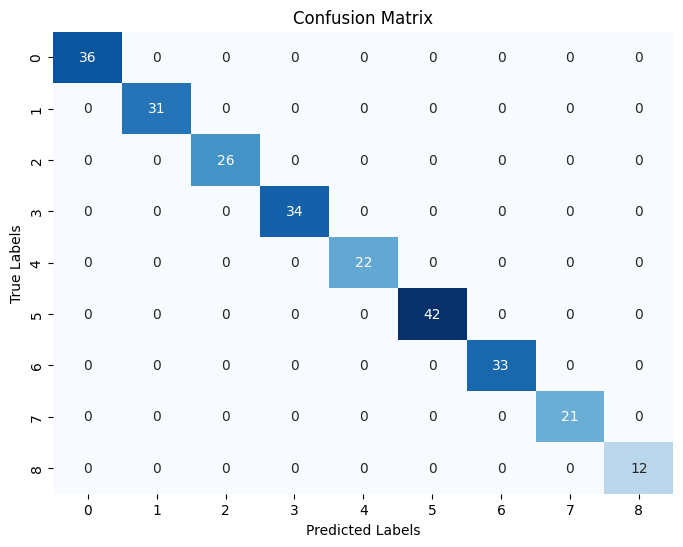

In [43]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

<hr>

In [27]:
test = pd.read_csv("/content/HAR/test/000ba64d-bc61-4e0f-b1f1-87cf4a8d97b3.csv")
test

,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z
0,4.918190,0.923496,-0.093004,0.193295,-0.031665,-0.031503
1,4.865548,0.989570,-0.091665,0.203910,-0.032893,-0.035193
2,4.819174,1.041814,-0.093290,0.215411,-0.035249,-0.040684
3,4.794107,1.095595,-0.094055,0.218507,-0.038367,-0.046624
4,4.781573,1.135547,-0.094342,0.215411,-0.042662,-0.051845
...,...,...,...,...,...,...
495,4.232601,1.845456,-0.232652,-0.284414,0.043276,0.032043
496,4.419352,1.639551,-0.244314,-0.279990,0.042883,0.037353
497,4.090971,1.359891,-0.243453,-0.269817,0.042466,0.042214
498,3.989449,1.232353,-0.249666,-0.257432,0.042589,0.046444


In [28]:
x = test
x['label'] = 'xxx'
a = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].mean()
a = a.rename(columns={'Acc_X':'Acc_Xmean',
                        'Acc_Y':'Acc_Ymean',
                        'Acc_Z':'Acc_Zmean',
                        'Gyr_X':'Gyr_Xmean',
                        'Gyr_Y':'Gyr_Ymean',
                        'Gyr_Z':'Gyr_Zmean',})
b = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].std()
b = b.rename(columns={'Acc_X':'Acc_Xstd',
                        'Acc_Y':'Acc_Ystd',
                        'Acc_Z':'Acc_Zstd',
                        'Gyr_X':'Gyr_Xstd',
                        'Gyr_Y':'Gyr_Ystd',
                        'Gyr_Z':'Gyr_Zstd',
                        })
ab = a.join(b)
ab.reset_index(drop=True, inplace=True)
ab

,Acc_Xmean,Acc_Ymean,Acc_Zmean,Gyr_Xmean,Gyr_Ymean,Gyr_Zmean,Acc_Xstd,Acc_Ystd,Acc_Zstd,Gyr_Xstd,Gyr_Ystd,Gyr_Zstd
0,4.072637,1.210312,-0.192467,0.039451,0.002986,0.002493,0.664479,0.416649,0.079249,0.347835,0.045647,0.042633


In [29]:
result = clf.predict(ab)
result

array(['C07'], dtype=object)

In [30]:
submit_df = pd.read_csv("/content/sample_submission.csv")
folder_path = "/content/HAR/test"
for idx,row in submit_df[:].iterrows():
    csvfile = os.path.join(folder_path,row['id'])
    x = pd.read_csv(csvfile)
    x['label'] = 'xxx'
    a = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].mean()
    a = a.rename(columns={'Acc_X':'Acc_Xmean',
                            'Acc_Y':'Acc_Ymean',
                            'Acc_Z':'Acc_Zmean',
                            'Gyr_X':'Gyr_Xmean',
                            'Gyr_Y':'Gyr_Ymean',
                            'Gyr_Z':'Gyr_Zmean',})
    b = x.groupby(['label'])[['Acc_X','Acc_Y','Acc_Z','Gyr_X','Gyr_Y','Gyr_Z']].std()
    b = b.rename(columns={'Acc_X':'Acc_Xstd',
                            'Acc_Y':'Acc_Ystd',
                            'Acc_Z':'Acc_Zstd',
                            'Gyr_X':'Gyr_Xstd',
                            'Gyr_Y':'Gyr_Ystd',
                            'Gyr_Z':'Gyr_Zstd',
                            })
    ab = a.join(b)
    ab.reset_index(drop=True, inplace=True)
    result = clf.predict(ab)
    submit_df.at[idx,'class'] = result[0]
    # break

In [31]:
submit_df

,id,class
0,000ba64d-bc61-4e0f-b1f1-87cf4a8d97b3.csv,C07
1,00830c34-f50e-4213-87dd-84235401ea61.csv,C03
2,00944d21-19f4-4783-a7c4-69a9d063c8dd.csv,C07
3,00ae23cd-1c86-465d-b108-e82b8267906e.csv,C06
4,018b1306-c9b3-4a12-b393-ace3ec021e77.csv,C05
...,...,...
969,fe89e0e3-769b-406b-af56-862b4f1f6221.csv,C07
970,ff291506-8227-416d-abf8-1d5ed17d57f1.csv,C06
971,ff400e2b-316d-4b48-ace6-df3e7cc24d60.csv,C08
972,ffa6db04-5c01-42d2-83cd-5e42d0b7b9af.csv,C07


In [32]:
import time
version = 'test'
formatted_time = time.strftime("%H.%M", time.localtime())
formatted_time = str(int(formatted_time.split(".")[0])+7)+formatted_time.split(".")[1]
formatted_time
csv_name = f'v.{version}.{formatted_time}.csv'
print(csv_name)
submit_df.to_csv(csv_name,index=False)

v.test.1327.csv
